Ensure all libraries are compatible and pre-installed in your system
Run the cells in order to avoid errors

In [1]:
import sqlparse

Load SQL injection queries

In [2]:
attacks=open('attacks.sql','r').read()
state1=sqlparse.split(attacks)

In [3]:
state1

["SELECT `col2` FROM `tab` WHERE `col1` LIKE '%'f'%';",
 'DELETE FROM `tab` WHERE `col2` < "exec sp_addlogin \'name\' , \'password\'";',
 'INSERT INTO `tab` ( `col2`, `col2` ) VALUES ( "\' AND 1=utl_inaddr.get_host_address((SELECT DISTINCT(PASSWORD) FROM (SELECT DISTINCT(PASSWORD), ROWNUM AS LIMIT FROM SYS.USER$) WHERE LIMIT=1)) AND \'i\'=\'i", "1\' and 1=(select count(*) from tablenames);\n --" );',
 'INSERT INTO `tab` ( `col1` ) VALUES ( \'" OR ELT(8157=8157,SLEEP(5)) AND "onoB" LIKE "onoB\' );',
 'INSERT INTO `tab` ( `col2` ) VALUES ( "\';\n if not(select system_user) <> \'sa\' waitfor delay \'0:0:2\' --" );',
 "DELETE FROM `tab` WHERE `col3` < '))) AND EXP(~(SELECT * FROM (SELECT CONCAT(0x717a706271,(SELECT (ELT(1514=1514,1))),0x7178767171,0x78))x)) AND (((3088=3088';",
 'DELETE FROM `tab` WHERE `col2` = \'h\' LIMIT \'%")) AND 9304=(SELECT COUNT(*) FROM SYSIBM.SYSTABLES AS T1,SYSIBM.SYSTABLES AS T2,SYSIBM.SYSTABLES AS T3)--\';',
 'SELECT `col3`, `col2`, `col1`, `col3` FROM `tab` WH

Load Non-malicious sql queries

In [4]:
benign=open('sane.sql','r').read()
state2=sqlparse.split(benign)

In [5]:
state2

['CREATE SCHEMA /*!IF NOT EXISTS*/ schema;',
 'DROP TABLE /*! IF EXISTS*/ table0_int_autoinc;',
 'CREATE TABLE `table0_int_autoinc` (\nCREATE INDEX idx_table0_int_autoinc_`col_set_latin1_not_null_key ON table0_int_autoinc(`col_set_latin1_not_null_key);',
 'CREATE INDEX idx_table0_int_autoinc_`col_enum_latin1_key_default_null ON table0_int_autoinc(`col_enum_latin1_key_default_null);',
 'CREATE INDEX idx_table0_int_autoinc_`col_int_unsigned_not_null_key ON table0_int_autoinc(`col_int_unsigned_not_null_key);',
 'CREATE INDEX idx_table0_int_autoinc_`col_enum_utf8_key_default_null ON table0_int_autoinc(`col_enum_utf8_key_default_null);',
 'CREATE INDEX idx_table0_int_autoinc_`col_int_unsigned_key_default_null ON table0_int_autoinc(`col_int_unsigned_key_default_null);',
 'CREATE INDEX idx_table0_int_autoinc_`col_char_latin1_key_default_null ON table0_int_autoinc(`col_char_latin1_key_default_null);',
 'CREATE INDEX idx_table0_int_autoinc_`col_char_latin1_key ON table0_int_autoinc(`col_char_la

Dataframe operations to merge them 

In [6]:
import pandas as pd
df1=pd.DataFrame(state1,columns=['Statement'])
df1['Label']=1


In [7]:
print(df1)

                                                Statement  Label
0       SELECT `col2` FROM `tab` WHERE `col1` LIKE '%'...      1
1       DELETE FROM `tab` WHERE `col2` < "exec sp_addl...      1
2       INSERT INTO `tab` ( `col2`, `col2` ) VALUES ( ...      1
3       INSERT INTO `tab` ( `col1` ) VALUES ( '" OR EL...      1
4       INSERT INTO `tab` ( `col2` ) VALUES ( "';\n if...      1
...                                                   ...    ...
393340  SELECT `col1`, `col1`, `col1`, `col1` FROM `ta...      1
393341  SELECT `col1`, `col1`, `col1` FROM `tab` WHERE...      1
393342  DELETE FROM `tab` WHERE `col2` < '0)) AS BVgz ...      1
393343  INSERT INTO `tab` ( `col1`, `col2` ) VALUES ( ...      1
393344  WAITFOR DELAY '0:0:5' AND ((("URjE"="URjE" );\...      1

[393345 rows x 2 columns]


In [8]:
import numpy as np

In [9]:
import pandas as pd
df2=pd.DataFrame(state2,columns=['Statement'])
df2['Label']=0


In [10]:
print(df2)

                                                Statement  Label
0                CREATE SCHEMA /*!IF NOT EXISTS*/ schema;      0
1          DROP TABLE /*! IF EXISTS*/ table0_int_autoinc;      0
2       CREATE TABLE `table0_int_autoinc` (\nCREATE IN...      0
3       CREATE INDEX idx_table0_int_autoinc_`col_enum_...      0
4       CREATE INDEX idx_table0_int_autoinc_`col_int_u...      0
...                                                   ...    ...
345194  DELETE FROM `tab` WHERE `col1` LIKE "%'g'%" OR...      0
345195  SELECT `col3`, `col3` FROM `tab` WHERE `col3` ...      0
345196  UPDATE `tab` SET `col3` = 2 WHERE `col1` = 334...      0
345197  SELECT `col2`, `col1`, `col2`, `col1` FROM `ta...      0
345198  INSERT INTO `tab` ( `col1`, `col3` ) VALUES ( ...      0

[345199 rows x 2 columns]


In [11]:
df=pd.concat([df1,df2],ignore_index=True)

This makes up the main dataset

In [12]:
print(df)

                                                Statement  Label
0       SELECT `col2` FROM `tab` WHERE `col1` LIKE '%'...      1
1       DELETE FROM `tab` WHERE `col2` < "exec sp_addl...      1
2       INSERT INTO `tab` ( `col2`, `col2` ) VALUES ( ...      1
3       INSERT INTO `tab` ( `col1` ) VALUES ( '" OR EL...      1
4       INSERT INTO `tab` ( `col2` ) VALUES ( "';\n if...      1
...                                                   ...    ...
738539  DELETE FROM `tab` WHERE `col1` LIKE "%'g'%" OR...      0
738540  SELECT `col3`, `col3` FROM `tab` WHERE `col3` ...      0
738541  UPDATE `tab` SET `col3` = 2 WHERE `col1` = 334...      0
738542  SELECT `col2`, `col1`, `col2`, `col1` FROM `ta...      0
738543  INSERT INTO `tab` ( `col1`, `col3` ) VALUES ( ...      0

[738544 rows x 2 columns]


Target Model definition and training

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load data
# Assuming `df` DataFrame already contains `Statements` and `Labels`
statements = df['Statement'].values
labels = df['Label'].values

# Tokenize the text data
tokenizer = Tokenizer(num_words=5000)  # Adjust the vocabulary size as needed
tokenizer.fit_on_texts(statements)
sequences = tokenizer.texts_to_sequences(statements)

# Pad the sequences
max_length = 50  # Reduce padding length for lightweight computation
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    padded_sequences, labels, test_size=0.3, random_state=42
)

# Lightweight model architecture
model = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=max_length),  # Reduced embedding size
    LSTM(32),  # Single LSTM layer with fewer units
    Dropout(0.2),  # Lower dropout for regularization
    Dense(16, activation='relu'),  # Smaller dense layer
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=25,  
    batch_size=128,  # Larger batch size for faster processing
    verbose=1
)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Generate classification report
y_pred = (model.predict(X_test) > 0.5).astype(int)
print(classification_report(y_test, y_pred))


Epoch 1/25


c:\Users\aswin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


4039/4039 ━━━━━━━━━━━━━━━━━━━━ 46s 11ms/step - accuracy: 0.8511 - loss: 0.3701 - val_accuracy: 0.9050 - val_loss: 0.3037
Epoch 2/25
4039/4039 ━━━━━━━━━━━━━━━━━━━━ 41s 10ms/step - accuracy: 0.9043 - loss: 0.2762 - val_accuracy: 0.9034 - val_loss: 0.2596
Epoch 3/25
4039/4039 ━━━━━━━━━━━━━━━━━━━━ 41s 10ms/step - accuracy: 0.8832 - loss: 0.2924 - val_accuracy: 0.9055 - val_loss: 0.2575
Epoch 4/25
4039/4039 ━━━━━━━━━━━━━━━━━━━━ 41s 10ms/step - accuracy: 0.9022 - loss: 0.2596 - val_accuracy: 0.9794 - val_loss: 0.0672
Epoch 5/25
4039/4039 ━━━━━━━━━━━━━━━━━━━━ 42s 10ms/step - accuracy: 0.9790 - loss: 0.0671 - val_accuracy: 0.9820 - val_loss: 0.0540
Epoch 6/25
4039/4039 ━━━━━━━━━━━━━━━━━━━━ 41s 10ms/step - accuracy: 0.9822 - loss: 0.0547 - val_accuracy: 0.9821 - val_loss: 0.0524
Epoch 7/25
4039/4039 ━━━━━━━━━━━━━━━━━━━━ 41s 10ms/step - accuracy: 0.9777 - loss: 0.0683 - val_accuracy: 0.9824 - val_loss: 0.0531
Epoch 8/25
4039/4039 ━━━━━━━━━━━━━━━━━━━━ 41s 10ms/step - accuracy: 0.9824 - loss: 0.05

Target Model Training and Validation Loss and Accuracy 

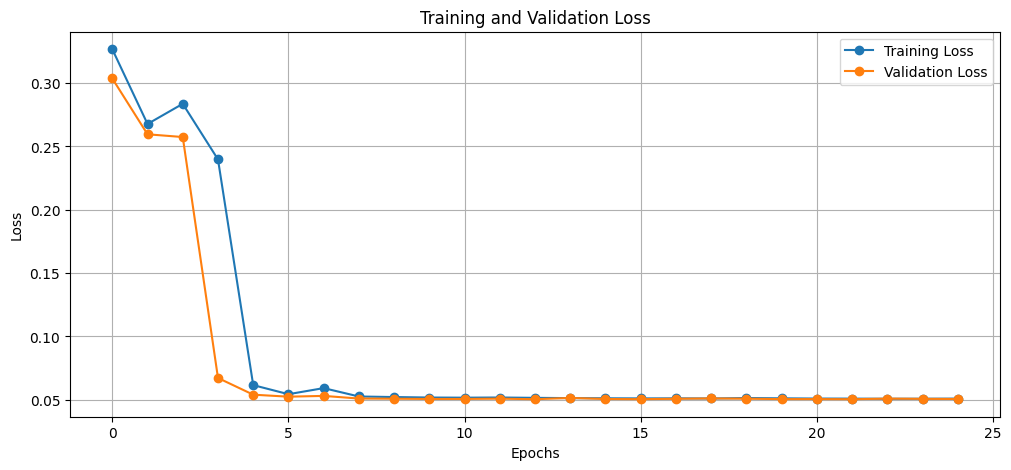

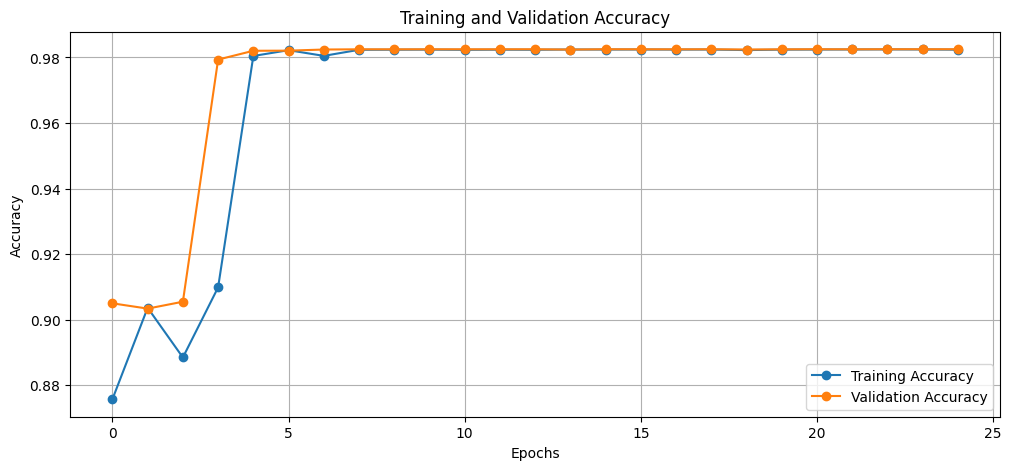

In [16]:
import matplotlib.pyplot as plt

# Extract values from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot training and validation loss
plt.figure(figsize=(12, 5))
plt.plot(train_loss, label='Training Loss', marker='o')
plt.plot(val_loss, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(12, 5))
plt.plot(train_accuracy, label='Training Accuracy', marker='o')
plt.plot(val_accuracy, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()


In [15]:
model.save('sqli_detection_model.keras')


Perturbation Method V1.0

In [18]:
import random

def restructure_query_advanced(query):
    """
    Applies advanced perturbations to restructure an SQL query.
    Includes: 
    - Case changes
    - Keyword replacements
    - Operator substitutions
    - Clause reordering
    - Dummy condition insertion
    - Random spacing and encoding of certain characters
    """
    replacements = {
        "SELECT": ["select", "SeLeCt", "  SELECT  "],
        "WHERE": ["where", "WhErE", " WHERE   "],
        "AND": ["and", "AnD", "  AND  "],
        "OR": ["or", "Or", " OR   "],
        "=": [" = ", " ==", "  =   ", " like "],
        "'": ['"', "''", "`"],
        "FROM": ["from", "FrOm", "  FROM  "],
        "*": ["*", " all ", "  * "],
    }

    # Introduce random spacing
    def random_spacing(word):
        if random.random() < 0.3:  # 30% chance to add extra spaces
            return f" {word}   "
        return word

    # Randomly swap "=" with "LIKE" or other operators
    def swap_operator(word):
        operators = ["=", "like", "!="]
        if word in operators and random.random() < 0.5:  # 50% chance to replace operator
            return random.choice(operators)
        return word

    # Introduce dummy conditions (e.g., "1=1")
    def add_dummy_condition(query_parts):
        if random.random() < 0.4:  # 40% chance to add dummy condition
            dummy_condition = random.choice(["1=1", "1!=0", "TRUE"])
            return query_parts + ["AND", dummy_condition]
        return query_parts

    # Reorder clauses in the query
    def reorder_clauses(query_parts):
        if "WHERE" in query_parts and random.random() < 0.5:  # 50% chance to reorder WHERE
            where_index = query_parts.index("WHERE")
            return query_parts[:where_index] + query_parts[where_index:]
        return query_parts

    # Encode specific characters
    def encode_characters(word):
        encoding_map = {
            "'": "%27",
            '"': "%22",
            "=": "%3D",
            " ": "%20"
        }
        if word in encoding_map and random.random() < 0.6:  # 30% chance to encode
            return encoding_map[word]
        return word

    words = query.split()
    perturbed_query = []

    for word in words:
        # Apply replacements if the word is in the replacement dictionary
        if word.upper() in replacements:
            perturbed_query.append(random.choice(replacements[word.upper()]))
        else:
            # Apply random spacing, character encoding, or leave as is
            word = random_spacing(word)
            word = swap_operator(word)
            word = encode_characters(word)
            perturbed_query.append(word)

    # Add dummy conditions
    perturbed_query = add_dummy_condition(perturbed_query)

    # Reorder clauses
    perturbed_query = reorder_clauses(perturbed_query)

    return " ".join(perturbed_query)


# Example usage
original_query = "SELECT * FROM users WHERE id = '1' AND name = 'John'"
perturbed_query = restructure_query_advanced(original_query)
print(f"Original: {original_query}")
print(f"Perturbed: {perturbed_query}")


Original: SELECT * FROM users WHERE id = '1' AND name = 'John'
Perturbed: select * from users where  id     == '1'   AND   name  == 'John' AND 1=1


Perturbation Method V1.1

In [ ]:
def restructure_query_advanced(query):
    """
    Applies advanced perturbations to restructure an SQL query.
    Enhancements:
    - Expanded character encoding
    - Frequent case swapping for individual characters
    - Random spacing
    - Dummy condition insertion
    """
    # Expanded encoding map
    encoding_map = {
        " ": "%20", "!": "%21", '"': "%22", "#": "%23", "$": "%24",
        "%": "%25", "&": "%26", "'": "%27", "(": "%28", ")": "%29",
        "*": "%2A", "+": "%2B", ",": "%2C", "-": "%2D", ".": "%2E",
        "/": "%2F", "0": "%30", "1": "%31", "2": "%32", "3": "%33",
        "4": "%34", "5": "%35", "6": "%36", "7": "%37", "8": "%38",
        "9": "%39", ":": "%3A", ";": "%3B", "<": "%3C", "=": "%3D",
        ">": "%3E", "?": "%3F", "@": "%40", "[": "%5B", "\\": "%5C",
        "]": "%5D", "^": "%5E", "_": "%5F", "`": "%60", "{": "%7B",
        "|": "%7C", "}": "%7D", "~": "%7E"
    }

    # Random case swapping for individual characters
    def add_embedded_comments(word):
        if random.random() < 0.4:  # 40% chance to embed a comment
            embedded_options = [
                f"/*+ OPTIMIZE({word}) */",
                f"/*! STRAIGHT_JOIN */ {word}",
                f"/*!50001 {word} */",
                f"/* QHint({word}) */"
            ]
            return random.choice(embedded_options)
        return word

    def case_swap(word):
        return ''.join(
            char.upper() if random.random() < 0.6 else char.lower()
            for char in word
        )

    # Encode specific characters in a word
    def encode_characters(word):
        return ''.join(
            encoding_map[char] if char in encoding_map and random.random() < 0.6 else char
            for char in word
        )

    # Add dummy conditions to the query
    def add_dummy_condition(query_parts):
        if random.random() < 0.5:  # 50% chance to add dummy condition
            dummy_condition = random.choice(["1=1", "1!=0", "TRUE", "NULL IS NULL"])
            return query_parts + ["AND", dummy_condition]
        return query_parts
    def wrap_subquery(query_parts):
        if random.random() < 0.4:  # 40% chance to wrap parts of query in a subquery
            return ["SELECT * FROM ("] + query_parts + [") AS subquery"]
        return query_parts
    

    # Reconstruct query with perturbations
    words = query.split()
    perturbed_query = []

    for word in words:
        word = case_swap(word)
        word = encode_characters(word)
        word = add_embedded_comments(word)
        perturbed_query.append(word)

    # Add dummy conditions
    perturbed_query = add_dummy_condition(perturbed_query)

    return " ".join(perturbed_query)


# Example DataFrame
data = {
    "Query": [
        "SELECT * FROM users WHERE id = '1' AND name = 'John'",
        "SELECT name, age FROM employees WHERE age >= 30",
        "SELECT COUNT(*) FROM orders WHERE status = 'completed'",
        "DELETE FROM logs WHERE timestamp < '2024-01-01'",
        "UPDATE accounts SET balance = balance + 100 WHERE id = '12345'"
    ]
}

df3 = pd.DataFrame(data)

# Apply the advanced perturbation function to the 'Query' column
df3["Perturbed Query"] = df3["Query"].apply(restructure_query_advanced)

# Display the DataFrame with the original and perturbed queries



In [20]:
df3

,Query,Perturbed Query
0,SELECT * FROM users WHERE id = '1' AND name = ...,/*!50001 SELEct */ %2A /*! STRAIGHT_JOIN */ Fr...
1,"SELECT name, age FROM employees WHERE age >= 30","sELeCT NAMe, AgE FROM EmPlOYEES wheRE aGE /*! ..."
2,SELECT COUNT(*) FROM orders WHERE status = 'co...,/*! STRAIGHT_JOIN */ selEct /*!50001 COUnt%28%...
3,DELETE FROM logs WHERE timestamp < '2024-01-01',/* QHint(DelETe) */ fRom LoGS /*+ OPTIMIZE(WHe...
4,UPDATE accounts SET balance = balance + 100 WH...,/*+ OPTIMIZE(uPDAte) */ AcCOuNtS /*+ OPTIMIZE(...


In [60]:
df4=pd.DataFrame()
#df4['perturbed_sql']=df['Statement'].apply(restructure_query_advanced)
#df4 = df[df['Label'] == 1].assign(perturbed_sql=df['Statement'].apply(restructure_query_advanced))[['perturbed_sql']].assign(label=1)
# Perturb only the malicious samples
malicious_df = df[df['Label'] == 1].copy()
malicious_df['perturbed_sql'] = malicious_df['Statement'].apply(restructure_query_advanced)
malicious_df['label'] = 1  # Keep label 1

# Keep benign samples as they are
benign_df = df[df['Label'] == 0].copy()
benign_df['perturbed_sql'] = benign_df['Statement']  # No perturbation
benign_df['label'] = 0  # Keep label 0

# Combine both
df4 = pd.concat([malicious_df[['perturbed_sql', 'label']], benign_df[['perturbed_sql', 'label']]], ignore_index=True)


In [59]:
del df4

In [61]:
# df4['label']=df['Label']
print(df4)

                                            perturbed_sql  label
0       selECt %60CoL2` /*!50001 FRom */ %60TAb` wHeRE...      1
1       Delete FrOM %60TaB%60 WHeRE /*!50001 %60COL%32...      1
2       INSERT /* QHint(Into) */ %60TAB%60 ( /*! STRAI...      1
3       INSerT /*! STRAIGHT_JOIN */ IntO %60taB` /*! S...      1
4       INSeRT iNTO /* QHint(`tAb`) */ /*!50001 ( */ %...      1
...                                                   ...    ...
738539  DELETE FROM `tab` WHERE `col1` LIKE "%'g'%" OR...      0
738540  SELECT `col3`, `col3` FROM `tab` WHERE `col3` ...      0
738541  UPDATE `tab` SET `col3` = 2 WHERE `col1` = 334...      0
738542  SELECT `col2`, `col1`, `col2`, `col1` FROM `ta...      0
738543  INSERT INTO `tab` ( `col1`, `col3` ) VALUES ( ...      0

[738544 rows x 2 columns]


In [62]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# Assuming your tokenizer is saved as `tokenizer`
# If you haven't saved it, you'll need to reload or reinitialize it

# Tokenize the 'perturbed_sql' column from df4
X_perturbed = tokenizer.texts_to_sequences(df4['perturbed_sql'])

# Pad sequences (make sure maxlen matches the one used during training)
X_perturbed_padded = pad_sequences(X_perturbed, maxlen=50)  # Adjust maxlen as per your model's training

# Predict using your trained model
predictions = model.predict(X_perturbed_padded)

# Get predicted labels (binary: 0 or 1)
predicted_labels = (predictions > 0.5).astype(int)

# Add the predictions to the df4 DataFrame
df4['predicted_label'] = predicted_labels

23080/23080 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step


In [27]:
maxlen = max(len(seq) for seq in sequences)
print(maxlen)

22243


In [22]:
from sklearn.metrics import accuracy_score

# Compare predicted labels with the true labels (which are 1 for all malicious)
accuracy = accuracy_score(df4['label'], df4['predicted_label'])
print(f"Accuracy on Perturbed Data: {accuracy}")


Accuracy on Perturbed Data: 0.5567779306310795


Testing Perturbation Impact with older perturbation method

In [ ]:
# from sklearn.metrics import accuracy_score

# # Compare predicted labels with the true labels (which are 1 for all malicious)
# accuracy = accuracy_score(df4['label'], df4['predicted_label'])
# print(f"Accuracy on Perturbed Data: {accuracy}")


Accuracy on Perturbed Data: 0.7113726467211161


In [23]:
from sklearn.metrics import classification_report

# Generate a detailed classification report
report = classification_report(df4['label'], df4['predicted_label'])
print(report)


              precision    recall  f1-score   support

           0       0.84      0.06      0.12    345199
           1       0.55      0.99      0.70    393345

    accuracy                           0.56    738544
   macro avg       0.69      0.53      0.41    738544
weighted avg       0.68      0.56      0.43    738544



In [65]:
df4['Label_flipped'] = df4['label'].apply(lambda x: 0 if x == 1 else 1)

In [69]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Ensure predicted labels are binary
df4['predicted_label'] = (df4['predicted_label'] > 0.5).astype(int)

# Get true and predicted labels
true_labels = df4['Label_flipped'].values
predicted_labels = df4['predicted_label'].values

# Check if lengths match
assert len(true_labels) == len(predicted_labels), "Mismatch in number of samples!"

# Compute confusion matrix
tn, fp, fn, tp = confusion_matrix(true_labels, predicted_labels).ravel()


# Escape rate = FN / (TP + FN)  (False Negative Rate)
escape_rate = tp / (tp + fn) if (tp + fn) != 0 else 0


detection_rate = fn / (tp + fn) if (tp + fn) != 0 else 0

# False Positive Rate
false_positive_rate = fp / (fp + tn) if (fp + tn) != 0 else 0

# False Negative Rate
false_negative_rate = fn / (fn + tp) if (fn + tp) != 0 else 0

# Overall accuracy
accuracy = accuracy_score(true_labels, predicted_labels)

# Print
print(f"Accuracy: {accuracy:.2f}")
print(f"Detection Rate : {detection_rate:.2f}")
print(f"Escape Rate: {escape_rate:.2f}")
print(f"False Positive Rate : {false_positive_rate:.2f}")
print(f"False Negative Rate : {false_negative_rate:.2f}")

# Optional: full report
print(classification_report(true_labels, predicted_labels))


Accuracy: 0.29
Detection Rate : 0.41
Escape Rate: 0.59
False Positive Rate : 0.98
False Negative Rate : 0.41
              precision    recall  f1-score   support

           0       0.06      0.02      0.03    393345
           1       0.35      0.59      0.44    345199

    accuracy                           0.29    738544
   macro avg       0.20      0.31      0.23    738544
weighted avg       0.19      0.29      0.22    738544

